## Plotting in PySpark

There are multiple libraries available for plots in PySpark. This notebook provides examples for some of the plopular plotting libraries. 

Before we look at these plotting libraries, lets understand how plotting works in the case of Spark. 
- The PySpark kernel is a python process which acts as a proxy to the Spark driver process. 
- This process runs in the cluster master. 
- We shall refer to this as the local kernel process or simply as Kernel. 
- All the Spark bound commands get executed in the Spark driver process which runs in any of the worker nodes of the cluster. 
- Unless, a few specific line or cell magics are used, the cells get executed in the Spark driver. So when executing a cell, its important to know where the commands get executed.
- The cell magic `%%local` when used, the code actually executes in the Kernel and not in the Spark driver. 
- There are ways in which dataframes from the Spark driver can be transferred to Kernel process, refer to the `%%sql` cell magic documentation or execute `%%help` for instant help in the notebook. 
- Since not all plotting libraries can be used in the Spark driver, the `%%local` cell magic can be used to transfer data from Spark driver to the Kernel process and use the plotting libraries to generate the plots. 
- However, currently data cannot be transferred from the Kernel process to the Spark driver.

The plotting libraries shown in this notebook are already bundled and can be used in the Kernel process.

## Matplotlib example

Matplotlib can be used to generate plots both in the Spark driver as well as the local kernel process. 
- Generating the plot in the Spark driver and transferring just the image is more effecient and recommended(Matplotlib Option-1). 



### Matplotlib Option-1

The below example shows the generation of a plot in the Spark driver. 
- Note the command which sets the backend for plotting `plt.switch_backend('agg')` and the use of `%matplot` line magic to display the plot. 
- The `%matplot` line magic should be used in its own cell. 

This magic generates the plot image in the Spark driver and transfers to the client this reducing transfer of large amounts of data.

In [15]:
# This code runs in Spark Driver
import pandas as pd
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import numpy as np

labels = 'apples', 'oranges', 'lemons', 'limes'
sizes = [10, 15, 5, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')


(-1.1000000169959514, 1.1000000318748258, -1.1177382958742947, 1.1138080491469575)

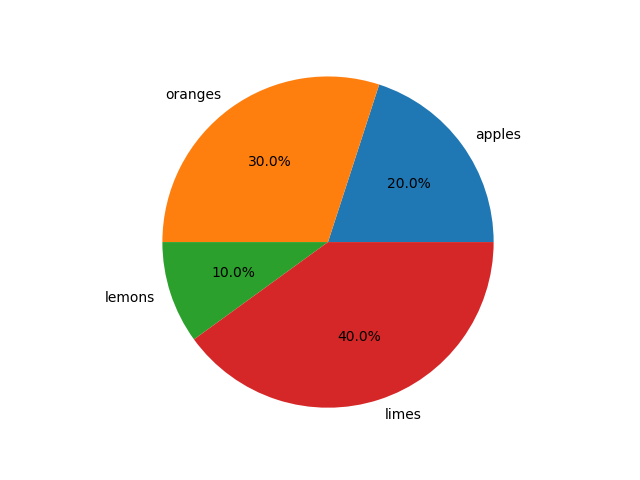

In [16]:
%matplot plt

### Matplotlib Option-2

The example below shows how matplotlib can be used to generate a plot in the local Kernel. 
- Note the use of `%%sql` line magic to transfer the data to kernel.
- Note the use of `%matplotlib inline` which is required for the local Kernel.

In [17]:
%%sql -o data -q
select * from default_qubole_airline_origin_destination limit 10

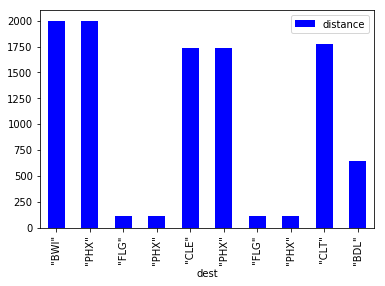

In [18]:
%%local
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data['distance'] = pd.to_numeric(data['distance'], errors='coerce')
data.plot(kind='bar', x='dest', y='distance', color='blue')

plt.show()

#### Transferring data from spark to local kernel

A dataframe can also be transferred from a non %%sql cell to %%local cell using the %spark line magic. An example is shown below.

In [19]:
import pandas as pd
pdf = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv")
sdf = spark.createDataFrame(pdf.astype(str))

In [20]:
%spark -o sdf

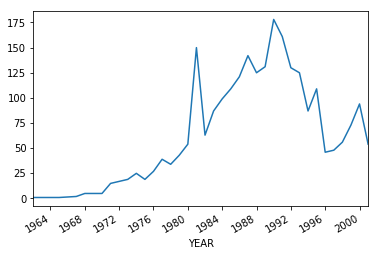

In [21]:
%%local
%matplotlib inline
sdf.groupby('YEAR').count()['storenum'].plot.line()

## Seaborn example

Seaborn is another plotting library which can be used for generating plots in Spark driver.

In [22]:
# This code runs in spark driver
import numpy as np
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import seaborn as sns
print(sns)
data = np.random.normal(0, 1, 3)
plt.figure(figsize=(9, 2))
sns.boxplot(x=data);


<module 'seaborn' from '/usr/lib/environs/e-a-2019.03-py-2.7.15/lib/python2.7/site-packages/seaborn/__init__.pyc'>

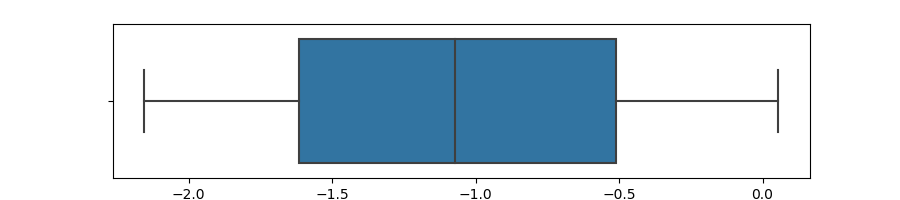

In [23]:
%matplot plt

## Altair example

Altair can be used to generate plots in the Kernel. An example is shown below.

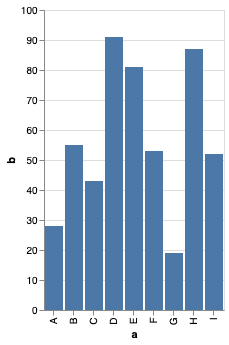

In [24]:
%%local
# step to move data to kernel using %%sql is not covered here - refer to Matplotlib Option-2 example
import altair as alt
import pandas as pd

source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

alt.Chart(source).mark_bar().encode(
    x='a',
    y='b'
)

## Bqplot example

Bqplot can be used to generate plots in the Kernel. An example is shown below.

In [25]:
%%local
# step to move data to kernel using %%sql is not covered here - refer to Matplotlib Option-2 example
from bqplot import pyplot as plt
import numpy as np

size = 100
np.random.seed(0)
x_data = np.arange(size)
y_data = np.cumsum(np.random.randn(size)  * 100.0)

plt.figure(title='Test Plot')
plt.plot(x_data, y_data)
plt.show()

## Ggplot example

Ggplot can be used to generate plots in the Kernel. In this example below, plotnine, a library based on ggplot2 is used to generate the plot.

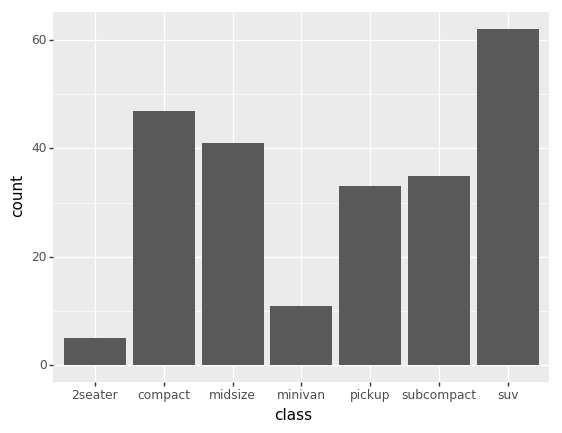

<ggplot: (-9223363263625355467)>

In [26]:
%%local
# step to move data to kernel using %%sql is not covered here - refer to Matplotlib Option-2 example
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

(ggplot(mpg)         # defining what data to use
 + aes(x='class')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)

## Pygal example

Pygal can be used to generate plots in the Kernel. An example is shown below.

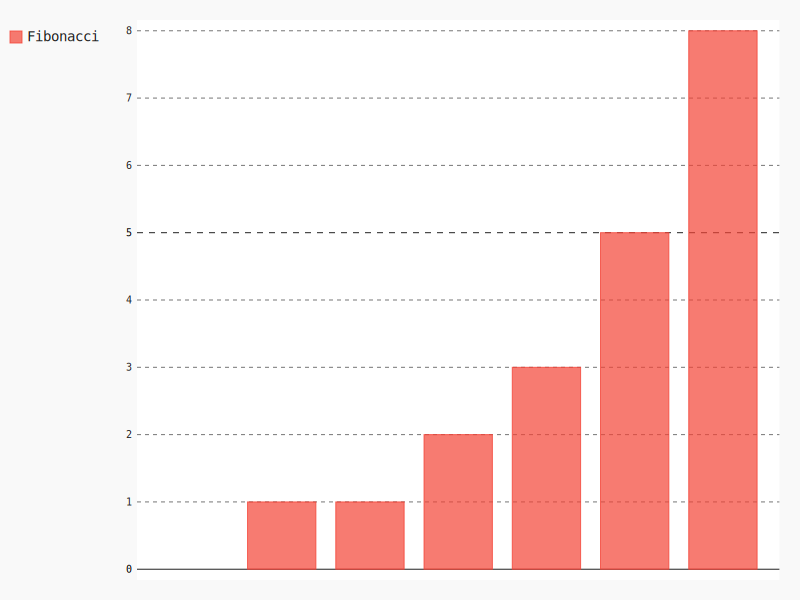

In [27]:
%%local
# step to move data to kernel using %%sql is not covered here - refer to Matplotlib Option-2 example
import pygal
from IPython.display import SVG, display
    
bar_chart = pygal.Bar()
bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8])
svg = SVG(bar_chart.render(disable_xml_declaration=True))
display(svg)


## Leather example

Leather can be used to generate plots in the Kernel. An example is shown below.

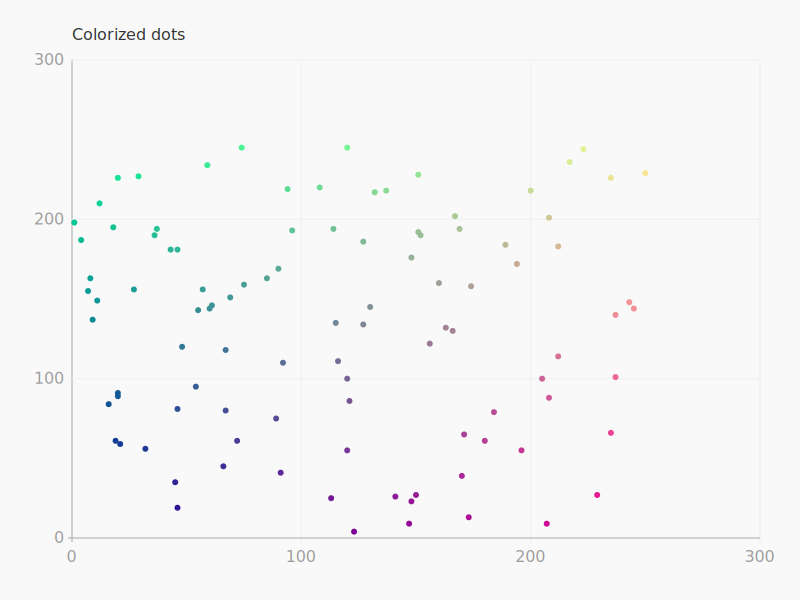

In [28]:
%%local
# step to move data to kernel using %%sql is not covered here - refer to Matplotlib Option-2 example
import random
import leather
dot_data = [(random.randint(0, 250), random.randint(0, 250)) for i in range(100)]
def colorizer(d):
    return 'rgb(%i, %i, %i)' % (d.x, d.y, 150)
chart = leather.Chart('Colorized dots')
chart.add_dots(dot_data, fill_color=colorizer)
chart.to_svg()